In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sys
sys.path.append(r'C:\Users\mostafa\AI&ML\File-important')

# Import the remove_outliers_iqr function
from outliers import remove_outliers_iqr

In [229]:
pd.set_option('display.max_rows', None)  # Display all rows
df=pd.read_csv('framingham.csv')
DESC=pd.read_csv('TenYearCHD_Column_Descriptions.csv')
print(DESC)

        Column Name                                        Description
0              male    Gender of the individual (1 = male, 0 = female)
1               age                     Age of the individual in years
2         education       Level of education (categorical, values 1-4)
3     currentSmoker  Whether the individual is a current smoker (1 ...
4        cigsPerDay        Average number of cigarettes smoked per day
5            BPMeds  Whether the individual is on blood pressure me...
6   prevalentStroke  Whether the individual has had a stroke previo...
7      prevalentHyp  Whether the individual has hypertension (1 = y...
8          diabetes  Whether the individual has diabetes (1 = yes, ...
9           totChol                    Total cholesterol level (mg/dL)
10            sysBP                     Systolic blood pressure (mmHg)
11            diaBP                    Diastolic blood pressure (mmHg)
12              BMI                            Body Mass Index (kg/m²)
13    

# EDA

In [230]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [231]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [232]:
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2658,0,40,2.0,1,20.0,0.0,0,0,0,250.0,104.0,74.0,18.75,90.0,NaN,0
989,1,53,2.0,0,0.0,0.0,0,1,0,287.0,122.0,80.0,26.26,77.0,85.0,0
277,0,67,1.0,0,0.0,0.0,0,1,0,302.0,147.0,92.0,25.23,80.0,87.0,1
2692,0,36,2.0,1,20.0,0.0,0,0,0,177.0,115.0,63.5,22.54,71.0,73.0,0
112,1,48,4.0,0,0.0,0.0,0,0,0,233.0,138.0,88.5,23.62,86.0,68.0,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [234]:
df.size

67808

In [235]:
df.shape

(4238, 16)

In [236]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [237]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [238]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

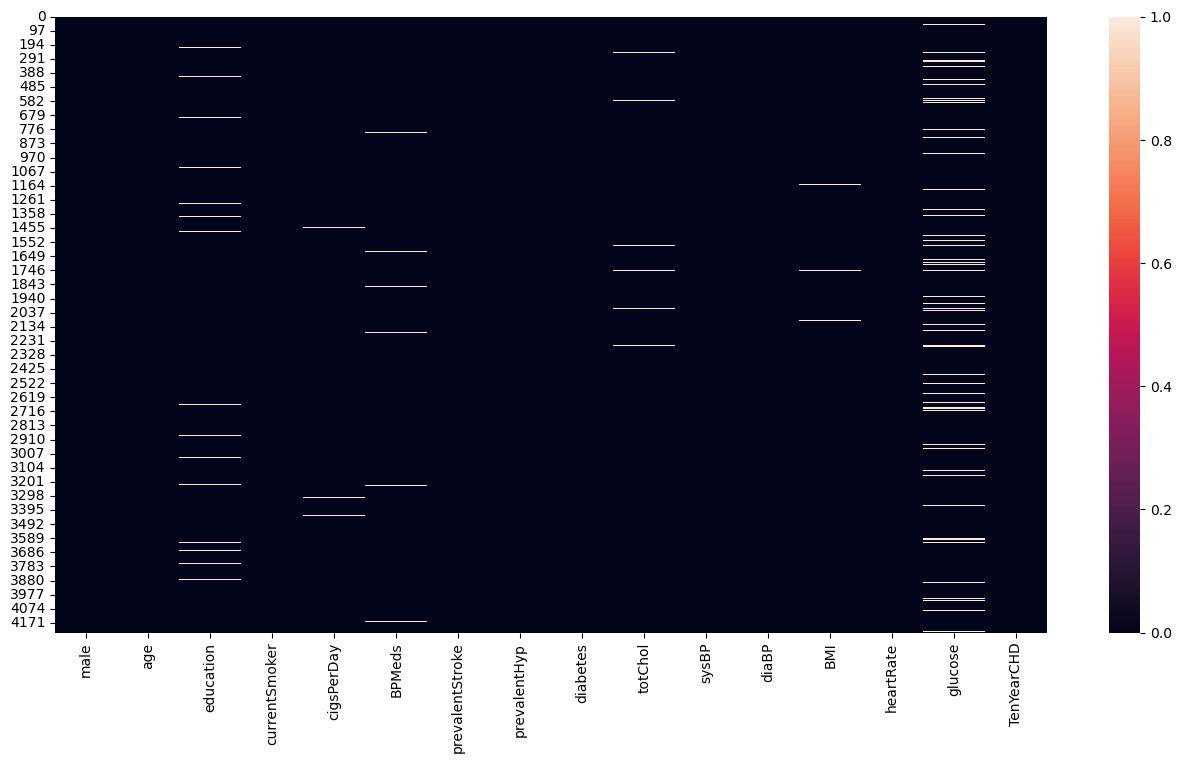

In [239]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isna())

In [240]:
df[df.duplicated()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [241]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

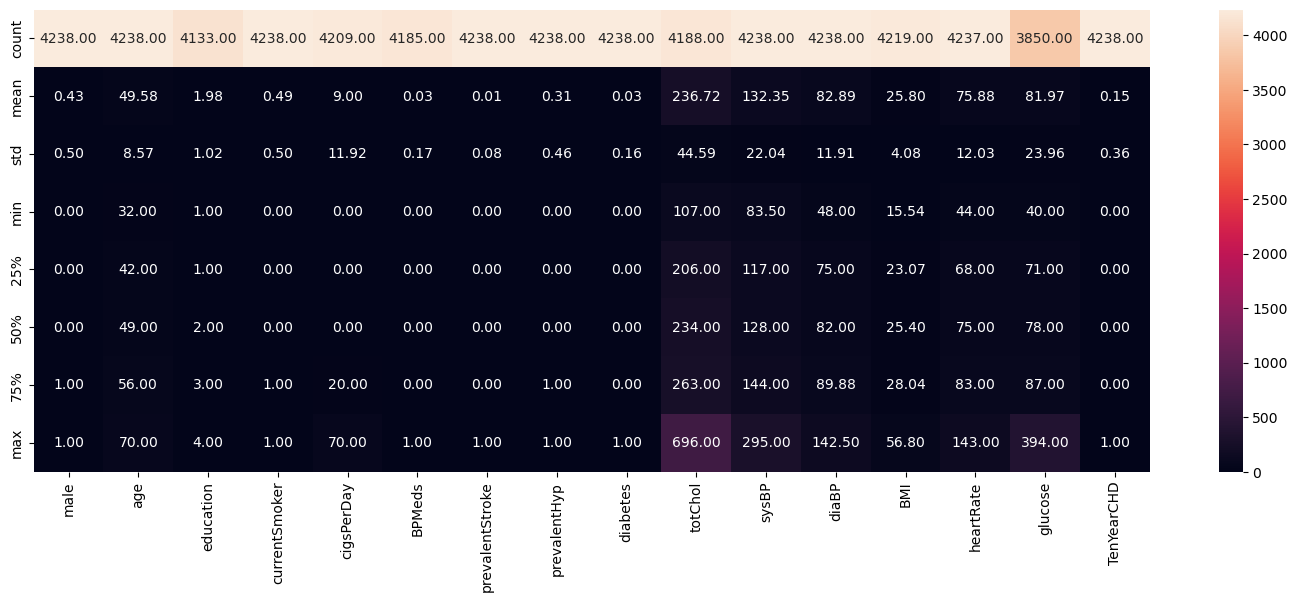

In [242]:
plt.figure(figsize=(18,6))
sns.heatmap(df.describe(),annot=True,fmt='0.2f')

# Cleaning & Dealing With Outliers

In [243]:
F,M=df.groupby('male')['glucose'].mean()
M,F

(82.13028169014085, 81.83690587138862)

In [244]:
F2,M2=df.groupby('male')['totChol'].mean()
M2,F2

(233.13134657836645, 239.45959595959596)

In [245]:
df.loc[df['male'] == 1, 'glucose'] = df.loc[df['male'] == 1, 'glucose'].fillna(M)
df.loc[df['male'] == 0, 'glucose'] = df.loc[df['male'] == 0, 'glucose'].fillna(F)

In [246]:
df.loc[df['male'] == 1, 'totChol'] = df.loc[df['male'] == 1, 'totChol'].fillna(M2)
df.loc[df['male'] == 0, 'totChol'] = df.loc[df['male'] == 0, 'totChol'].fillna(F2)

In [247]:
df.dropna(subset=['totChol'], inplace=True)

In [248]:
df.dropna(subset=['education'], inplace=True)

In [249]:
df.dropna(subset=['heartRate'], inplace=True)

In [250]:
df.dropna(subset=['BMI'],inplace=True)

In [251]:
df.dropna(subset=['BPMeds'],inplace=True)

In [252]:
df.dropna(subset=['cigsPerDay'],inplace=True)

<Axes: >

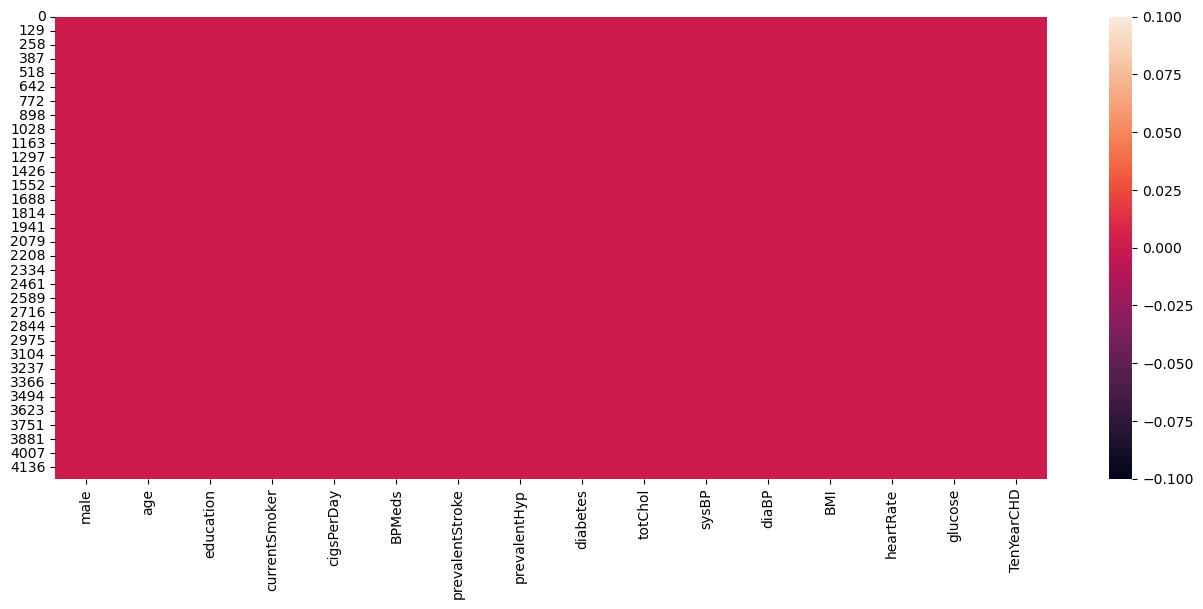

In [253]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna())

In [254]:
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1824,1,57,2.0,1,1.0,0.0,0,0,0,245.0,122.0,69.0,24.17,65.0,92.0,0
3340,0,64,1.0,0,0.0,1.0,0,1,0,285.0,160.0,87.0,29.97,65.0,87.0,0
3319,1,36,2.0,1,25.0,0.0,0,0,0,215.0,110.0,67.0,23.10,63.0,84.0,0
251,0,58,3.0,0,0.0,0.0,0,1,0,287.0,144.0,84.0,21.81,69.0,68.0,0
295,1,41,2.0,1,40.0,0.0,0,0,0,310.0,117.5,80.0,26.74,80.0,78.0,0


<Axes: ylabel='totChol'>

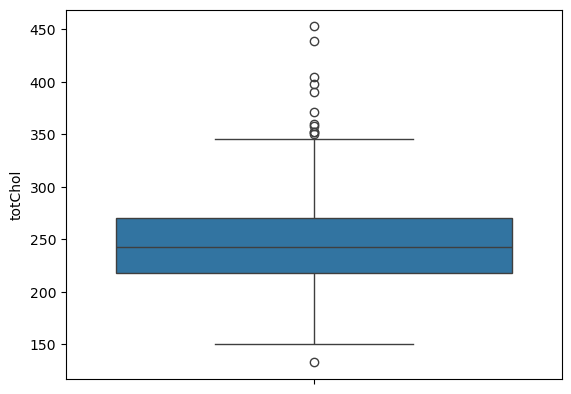

In [255]:
col_t=df.loc[(df['currentSmoker']==1)&(df['prevalentHyp']==1)]['totChol']
sns.boxplot(col_t)

In [256]:
df.loc[(df['currentSmoker']==1)&(df['prevalentHyp']==1)&(df['totChol']>350)&(df['TenYearCHD']==0)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
617,0,51,3.0,1,3.0,0.0,0,1,0,398.0,161.0,96.0,23.63,77.0,83.0,0
926,1,61,1.0,1,20.0,0.0,0,1,0,360.0,157.0,99.0,28.74,95.0,73.0,0
1103,0,60,4.0,1,20.0,0.0,0,1,0,352.0,149.0,73.0,25.96,80.0,79.0,0
2368,0,54,2.0,1,5.0,0.0,0,1,0,390.0,150.0,94.0,27.34,75.0,71.0,0
2488,0,67,2.0,1,15.0,0.0,0,1,0,371.0,166.0,85.0,25.35,100.0,86.0,0
3474,1,42,2.0,1,15.0,0.0,0,1,0,453.0,158.0,108.0,28.89,90.0,110.0,0


In [257]:
if df['totChol'].max() > 390:  # Check if the max value of 'totChol' is greater than 400
    x = remove_outliers_iqr(df, 'totChol')
else:
    print('no outliers')
x.count()

3983

In [258]:
df['totChol']=x

<Axes: ylabel='totChol'>

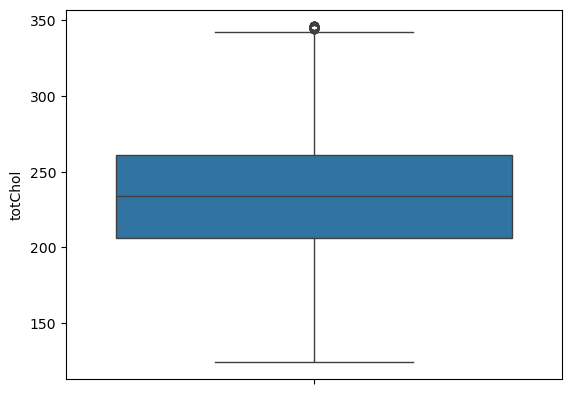

In [259]:
sns.boxplot(df['totChol'])

In [260]:
df.loc[df['glucose']>300]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1363,1,55,1.0,1,40.0,0.0,0,0,1,205.0,127.0,76.0,22.24,90.0,325.0,1
2406,0,62,1.0,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2801,0,47,1.0,1,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
2893,1,62,3.0,0,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2909,0,67,2.0,0,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
3817,1,47,2.0,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3844,0,62,3.0,1,20.0,1.0,0,1,1,NaN,215.0,110.0,37.62,110.0,368.0,1
3849,0,46,2.0,1,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0
3971,1,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0


<Axes: ylabel='glucose'>

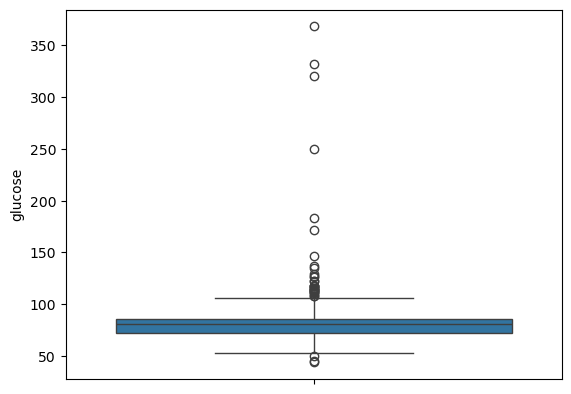

In [261]:
gul_t=df.loc[(df['currentSmoker']==1)&(df['prevalentHyp']==1)]['glucose']
sns.boxplot(gul_t)

In [262]:
df.loc[(df['glucose']>250)&(df['currentSmoker']==0)&(df['TenYearCHD']==0)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2406,0,62,1.0,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2891,1,49,1.0,0,0.0,0.0,0,0,1,248.0,130.5,82.0,27.29,52.0,254.0,0
3749,0,54,1.0,0,0.0,0.0,0,0,1,223.0,110.0,67.5,21.22,78.0,294.0,0
3971,1,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0
4228,0,50,1.0,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0


In [263]:
df = df.drop(df.loc[(df['glucose'] > 200) & (df['prevalentHyp'] == 1) & (df['TenYearCHD'] == 0)].index, axis=0)


In [264]:
df.loc[(df['glucose']>200)&(df['prevalentHyp']==1)&(df['TenYearCHD']==0)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [265]:
df=df.drop(df.loc[(df['glucose']>250)&(df['currentSmoker']==0)&(df['TenYearCHD']==0)].index,axis=0)

In [266]:
if df['glucose'].max() > 300:  # Check if the max value of 'totChol' is greater than 400
    x = remove_outliers_iqr(df, 'glucose')
else:
    print('no outliers')
x.count()

3788

In [267]:
df['glucose']=x


<Axes: ylabel='glucose'>

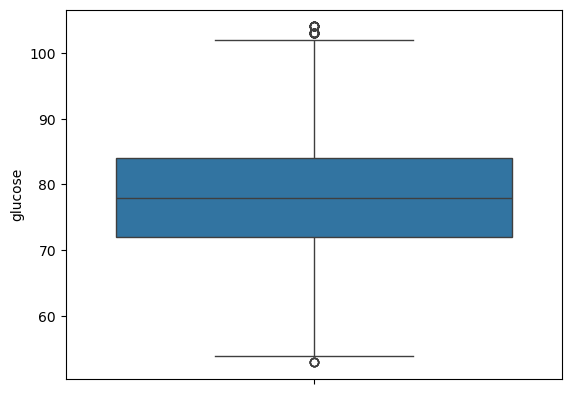

In [268]:
sns.boxplot(df['glucose'])

In [269]:
df.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             51
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            238
TenYearCHD           0
dtype: int64

In [270]:
df.dropna(subset=['glucose'],inplace=True)
df.dropna(subset=['totChol'],inplace=True)

In [271]:
df.loc[df['sysBP']>220]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
481,0,64,1.0,0,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1
1189,0,48,1.0,0,0.0,0.0,0,1,0,169.0,243.0,142.5,28.49,85.0,77.0,0
1989,1,61,1.0,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
3489,0,62,2.0,0,0.0,1.0,0,1,0,298.0,248.0,130.0,37.10,96.0,77.0,1
3616,0,54,2.0,1,15.0,0.0,0,1,0,262.0,230.0,110.0,24.76,93.0,97.0,0


# Normalization Data

In [272]:
scaler = MinMaxScaler()

# Normalize the selected columns
df[['age', 'diaBP', 'sysBP']] = scaler.fit_transform(df[['age', 'diaBP', 'sysBP']]).round(3)

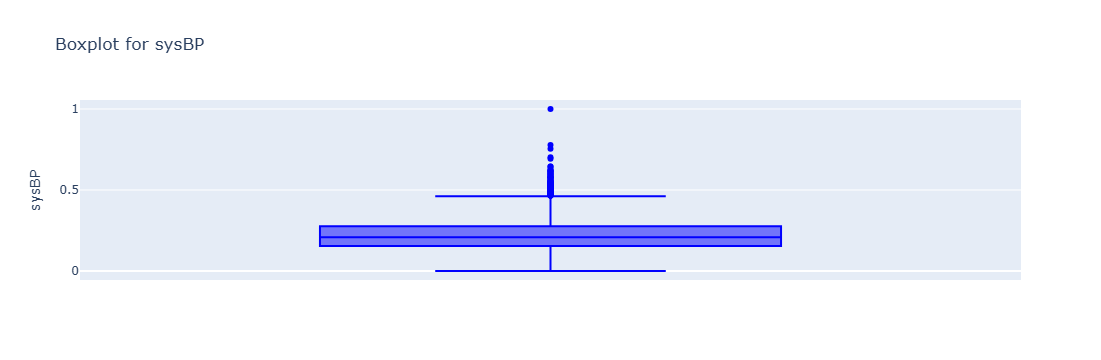

In [288]:
ex.box(df, y='sysBP', title='Boxplot for sysBP', 
             boxmode='overlay', 
             color_discrete_sequence=['blue','yellow','black']) 

In [289]:
df=df.drop(df.loc[df['sysBP']<0.043].index,axis=0)

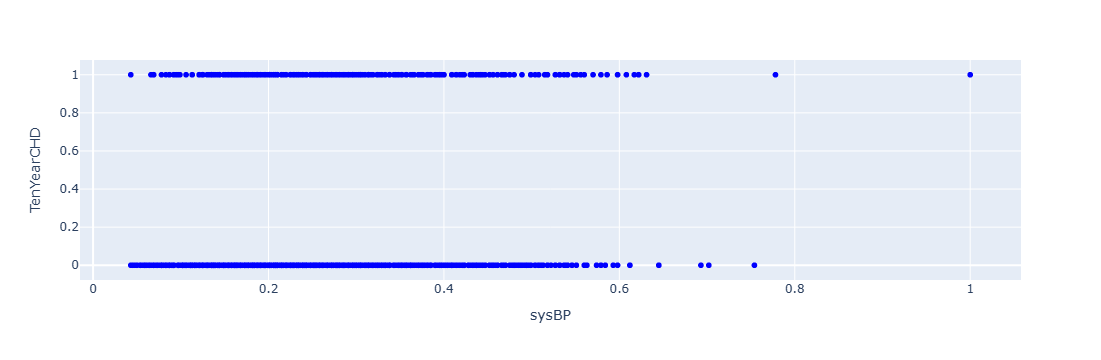

In [292]:
ex.scatter(df,x='sysBP',y='TenYearCHD', 
             color_discrete_sequence=['blue','yellow','black'])

In [293]:
df=df.drop(df.loc[df['sysBP']>0.612].index,axis=0)
# df=df.drop(df.loc[df['sysBP']<0.121].index,axis=0)


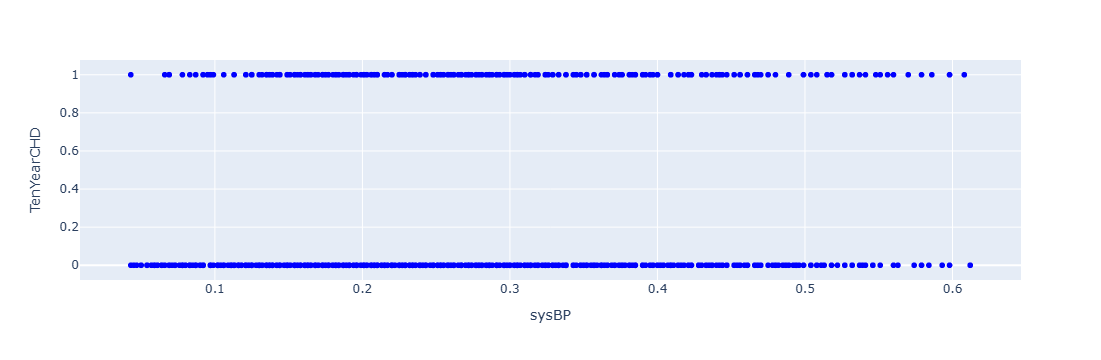

In [294]:
ex.scatter(df,x='sysBP',y='TenYearCHD',
             color_discrete_sequence=['blue','yellow','black'])

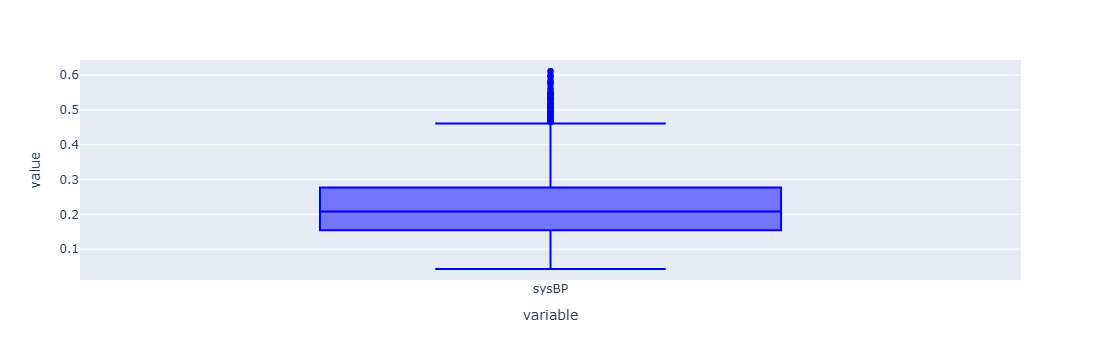

In [295]:
ex.box(df['sysBP'], color_discrete_sequence=['blue','yellow','black'])

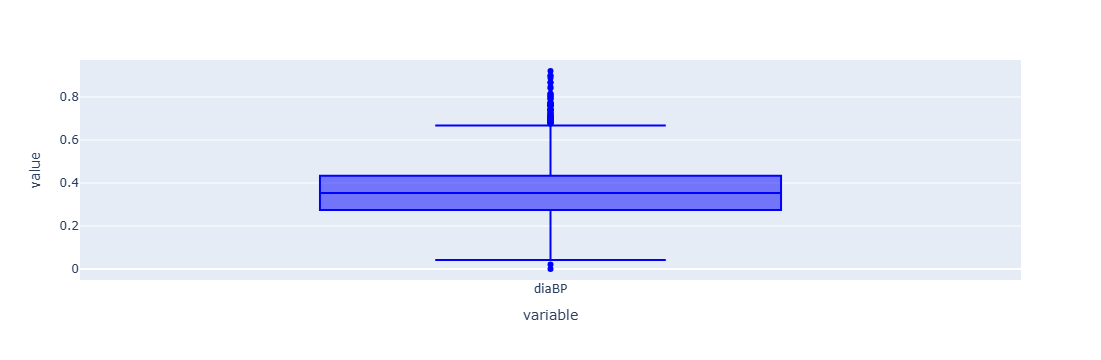

In [296]:
ex.box(df['diaBP'], 
             color_discrete_sequence=['blue','yellow','black'])

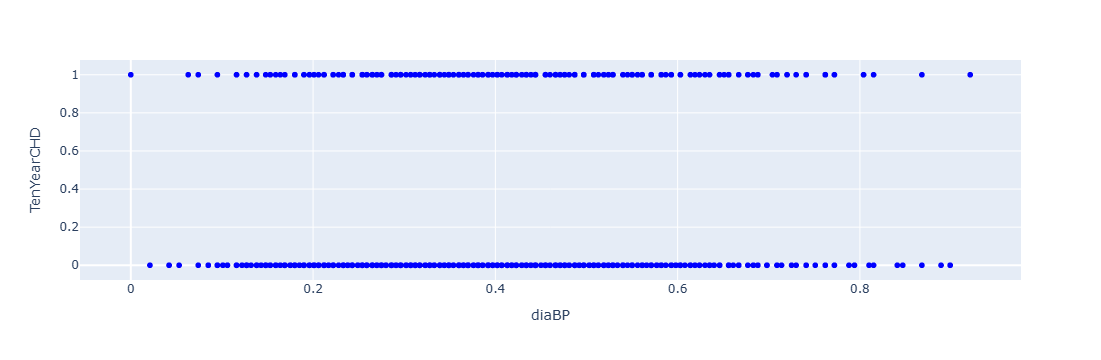

In [297]:
ex.scatter(df,x='diaBP',y='TenYearCHD', 
             color_discrete_sequence=['blue','yellow','black'])


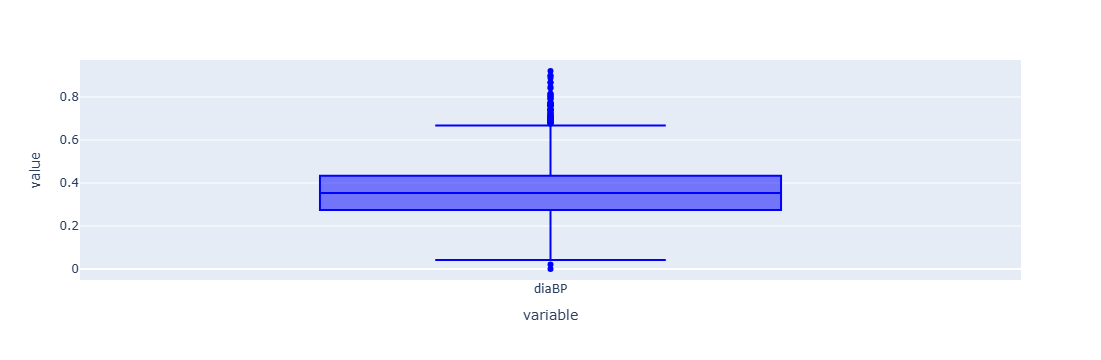

In [298]:
ex.box(df['diaBP'], 
             color_discrete_sequence=['blue','yellow','black'])

In [209]:
# df=df.drop(df.loc[df['diaBP']>0.931].index,axis=0)


In [299]:
df=df.drop(df.loc[df['diaBP']<0.063].index,axis=0)


In [300]:
df=df.drop(df.loc[df['diaBP']>0.815].index,axis=0)

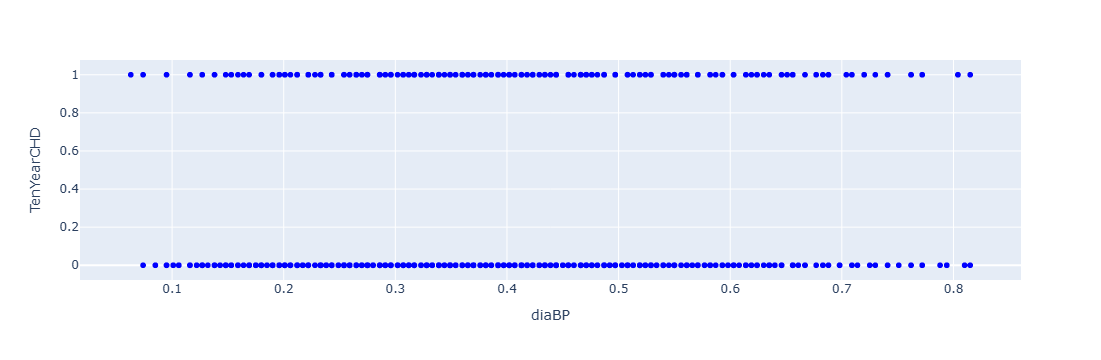

In [301]:
ex.scatter(df,x='diaBP',y='TenYearCHD', 
             color_discrete_sequence=['blue','yellow','black'])

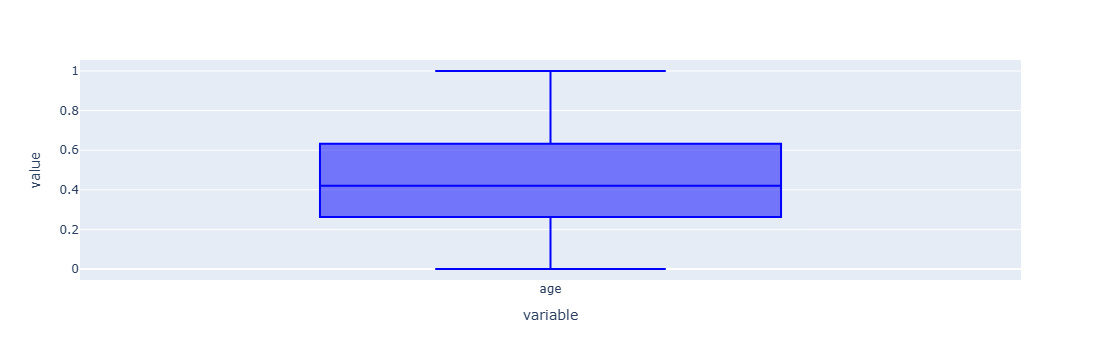

In [303]:
ex.box(df['age'], 
             color_discrete_sequence=['blue','yellow','black'])

In [214]:
# df=df.drop(df.loc[df['age']<0.079].index,axis=0)
# df=df.drop(df.loc[df['age']>0.974].index,axis=0)

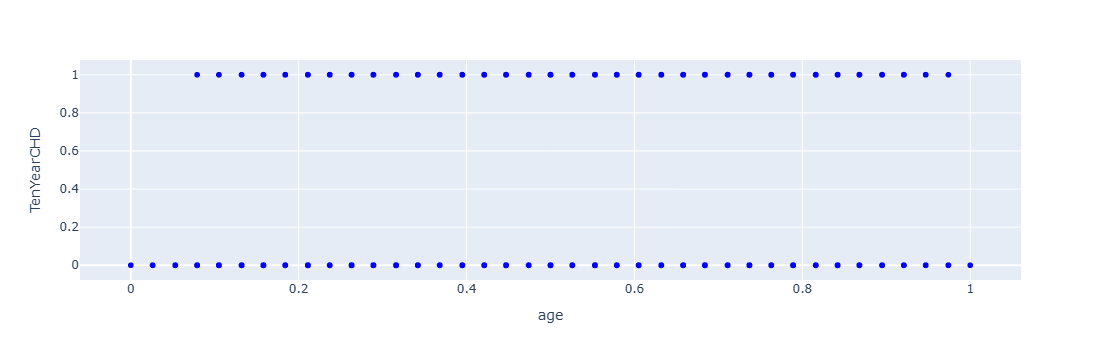

In [305]:
ex.scatter(df,x='age',y='TenYearCHD', 
             color_discrete_sequence=['blue','yellow','black'])

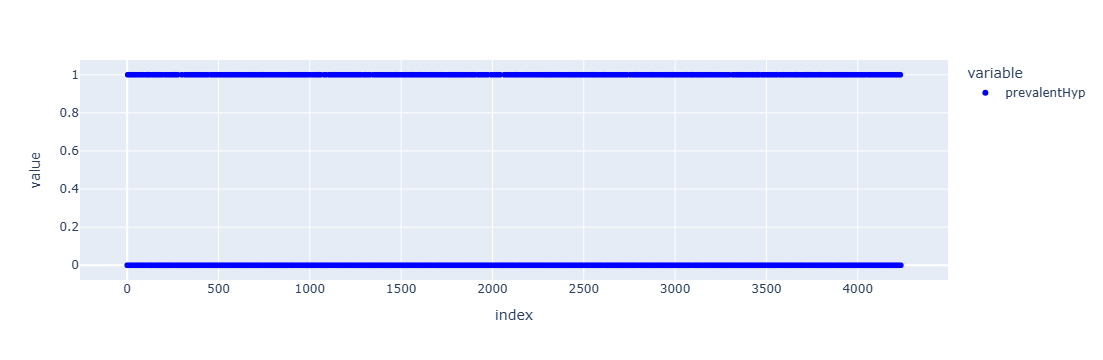

In [306]:
ex.scatter(df['prevalentHyp'], 
             color_discrete_sequence=['blue','yellow','black'])

# Analysis

In [218]:
data=df.corr()['TenYearCHD']
data

male               0.093778
age                0.215216
education         -0.048962
currentSmoker      0.031601
cigsPerDay         0.065208
BPMeds             0.073664
prevalentStroke    0.044895
prevalentHyp       0.157064
diabetes           0.000847
totChol            0.063259
sysBP              0.194759
diaBP              0.133146
BMI                0.057475
heartRate          0.015861
glucose            0.009972
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [219]:
Target_data=pd.DataFrame(data)

<Axes: >

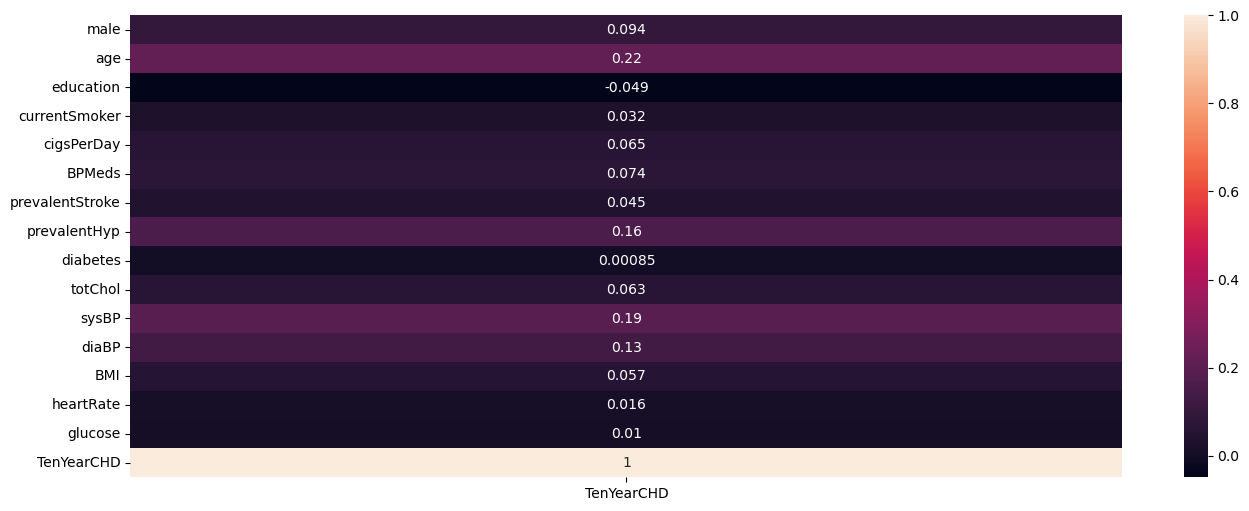

In [220]:
plt.figure(figsize=(16,6))
sns.heatmap(Target_data,annot=True)

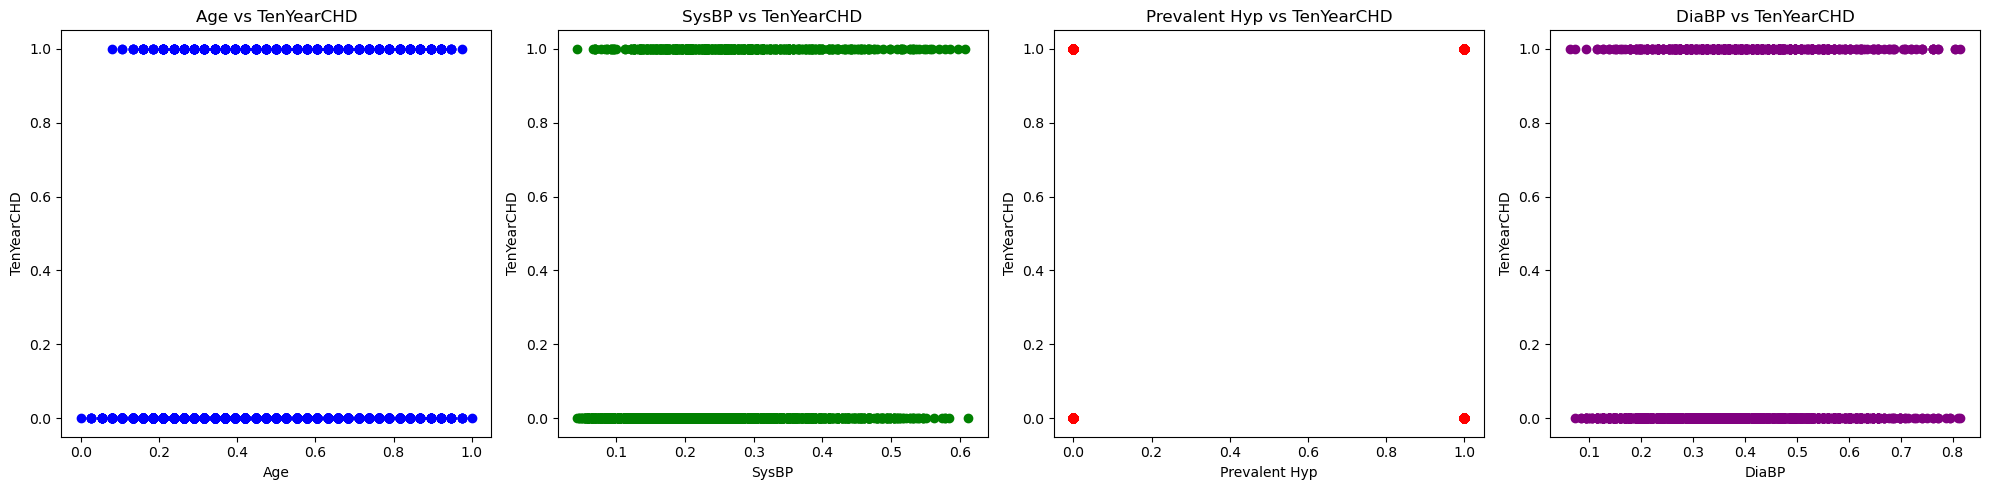

In [221]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.scatter(df['age'], df['TenYearCHD'], color='blue')
plt.xlabel('Age')
plt.ylabel('TenYearCHD')
plt.title('Age vs TenYearCHD')

plt.subplot(1, 4, 2)
plt.scatter(df['sysBP'], df['TenYearCHD'], color='green')
plt.xlabel('SysBP')
plt.ylabel('TenYearCHD')
plt.title('SysBP vs TenYearCHD')

plt.subplot(1, 4, 3)
plt.scatter(df['prevalentHyp'], df['TenYearCHD'], color='red')
plt.xlabel('Prevalent Hyp')
plt.ylabel('TenYearCHD')
plt.title('Prevalent Hyp vs TenYearCHD')

plt.subplot(1, 4, 4)
plt.scatter(df['diaBP'], df['TenYearCHD'], color='purple')
plt.xlabel('DiaBP')
plt.ylabel('TenYearCHD')
plt.title('DiaBP vs TenYearCHD')

plt.tight_layout()
plt.show()


## Modeling

Accuracy: 0.8075
Mean Squared Error (MSE): 0.1925
Mean Absolute Error (MAE): 0.1925


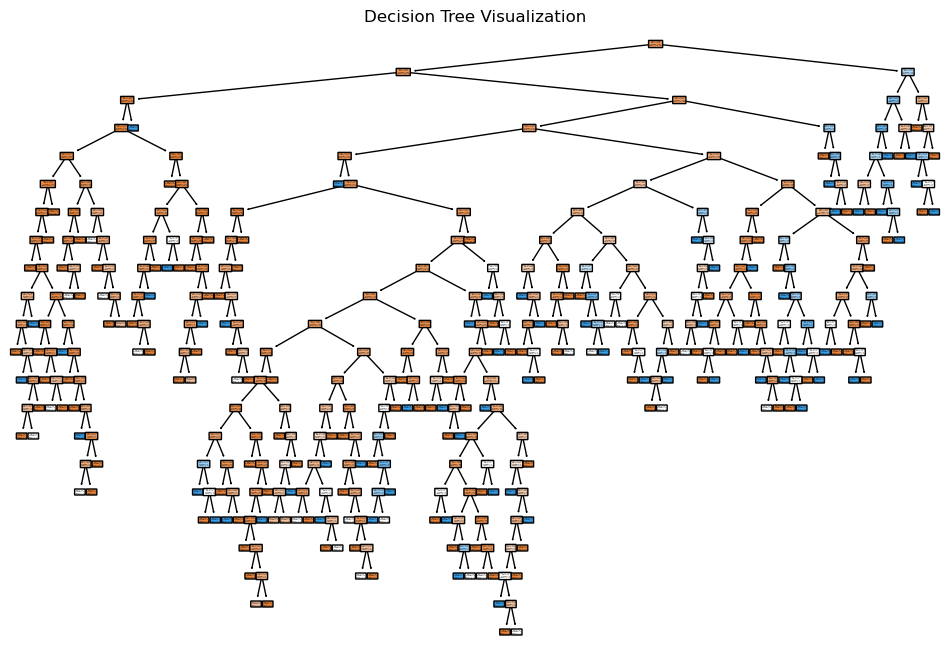

In [222]:
X = df[['age', 'sysBP']]  
y = df['TenYearCHD']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['age', 'sysBP'], class_names=['0', '1'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [74]:
features = ['age', 'sysBP', 'prevalentHyp']
target = 'TenYearCHD'

X = df[features]  
y = df[target]    

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Accuracy: 0.8605
Mean Squared Error (MSE): 0.1395
Mean Absolute Error (MAE): 0.1395
